In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import toolbox as tb

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv(".\data\projektbanka.csv")

In [3]:
df

ID_Klijenta    Država  Odobreni_Iznos_EUR  Mjesečna_Primanje_EUR  \
0            1001  Hrvatska            94934.28                5897.21   
1            1002  Hrvatska            82234.71                5466.71   
2            1003  Hrvatska            97953.77                9539.26   
3            1004  Hrvatska           115460.60                9433.69   
4            1005  Hrvatska            80316.93                4671.03   
...           ...       ...                 ...                    ...   
2015         2658  Hrvatska           111351.95                7401.28   
2016         1873  Hrvatska            57413.62                3205.30   
2017         2703  Hrvatska            97694.43                9542.15   
2018         1528  Hrvatska            85961.70                6112.71   
2019         2092  Hrvatska            84255.56                    NaN   

      Trenutni_Dug_EUR  Starost_Klijenta  Staž_Godine  \
0             45000.00              28.0         12.0   
1             45000.00              34.0         13.0   
2             45000.00              27.0         11.0   
3             39059.44              32.0         17.0   
4             45000.00              18.0         10.0   
...                ...               ...          ...   
2015          27290.05              18.0          2.0   
2016          45000.00              18.0          0.0   
2017          45000.00              26.0         13.0   
2018          45000.00              41.0         19.0   
2019          45000.00              43.0         18.0   

      Godine_Kreditne_Povijesti  Broj_članova_Kućanstva    Spol  \
0                           9.0                     2.0   muško   
1                          23.0                     3.0  žensko   
2                          16.0                     2.0   muško   
3                          30.0                     4.0       f   
4                           NaN                     2.0       f   
...                         ...                     ...     ...   
2015                        9.0                     1.0       f   
2016                        8.0                     6.0  žensko   
2017                       25.0                     1.0       m   
2018                       21.0                     4.0       M   
2019                       17.0                     5.0     NaN   

     Stambeni_Status Obrazovanje  
0          podstanar         SSS  
1          podstanar         SSS  
2          podstanar  magisterij  
3          podstanar         VSS  
4          podstanar         SSS  
...              ...         ...  
2015       podstanar         SSS  
2016       podstanar         SSS  
2017         vlasnik  magisterij  
2018         vlasnik         SSS  
2019              vl         SSS  

[2020 rows x 12 columns]

In [4]:
### Zaključak: Nazivi kolona imaju smislene nazive zbog čega niti jednu nema potrebe preimenovati.
### Kolona Država bi mogla imati identičnu vrijenost u svim ćelijama, pa ju to čini kandidatom za 
### uklanjanje iz dataframe-a u nastavku analize.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Klijenta                2020 non-null   int64  
 1   Država                     2020 non-null   object 
 2   Odobreni_Iznos_EUR         2020 non-null   float64
 3   Mjesečna_Primanje_EUR      1919 non-null   float64
 4   Trenutni_Dug_EUR           1919 non-null   float64
 5   Starost_Klijenta           1919 non-null   float64
 6   Staž_Godine                1919 non-null   float64
 7   Godine_Kreditne_Povijesti  1919 non-null   float64
 8   Broj_članova_Kućanstva     1919 non-null   float64
 9   Spol                       1919 non-null   object 
 10  Stambeni_Status            1919 non-null   object 
 11  Obrazovanje                1919 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 189.5+ KB


In [6]:
### Zaključak: dataframe ima 2020 redaka i 12 kolona od kojih su četiri tekstualni podaci, sedam ih je
### decimalnih i jedna kolona s cijelim brojevima. Već na prvu se može primjetiti da u nekim ćelijama
### nedostaju zapisi.

In [7]:
df.isna().sum()

ID_Klijenta                    0
Država                         0
Odobreni_Iznos_EUR             0
Mjesečna_Primanje_EUR        101
Trenutni_Dug_EUR             101
Starost_Klijenta             101
Staž_Godine                  101
Godine_Kreditne_Povijesti    101
Broj_članova_Kućanstva       101
Spol                         101
Stambeni_Status              101
Obrazovanje                  101
dtype: int64

In [8]:
### Zaključak: detaljnijim uvidom može se primjetiti kako gotovo sve kolone imaju po 101 redak s NaN 
### vrijednostima koje će kroz analizu biti potrebno popuniti na neki odgovarajući način.

In [9]:
df.describe()

ID_Klijenta  Odobreni_Iznos_EUR  Mjesečna_Primanje_EUR  \
count  2020.000000         2020.000000            1919.000000   
mean   2000.603465        85929.815401            6694.880573   
std     576.920116        19750.659531            1838.166648   
min    1001.000000        20174.650000            1644.560000   
25%    1502.750000        72694.725000            5467.530000   
50%    2002.500000        85893.835000            6618.190000   
75%    2498.250000        98722.072500            7935.160000   
max    3000.000000       150000.000000           19246.942762   

       Trenutni_Dug_EUR  Starost_Klijenta  Staž_Godine  \
count        1919.00000       1919.000000  1919.000000   
mean        43534.26522         35.178739    15.392392   
std          5928.30992          9.854248     5.660518   
min             0.00000         12.000000     0.000000   
25%         45000.00000         28.000000    11.000000   
50%         45000.00000         35.000000    15.000000   
75%         45000.00000         42.000000    19.000000   
max         96932.52968        100.000000    37.000000   

       Godine_Kreditne_Povijesti  Broj_članova_Kućanstva  
count                1919.000000             1919.000000  
mean                   15.137051                2.647212  
std                     8.801156                1.587254  
min                     0.000000               -5.000000  
25%                     8.000000                1.000000  
50%                    15.000000                2.000000  
75%                    23.000000                4.000000  
max                    30.000000                9.000000

In [10]:
### Zaključak: iz navedenog prikaza kolone koje imaju imaju nelogičnosti su: Starost_Klijenta zbog 
### min vrijednosti od 12 godina te max vrijednosti od 100 godina. Nadalje, Broj_članova_Kućanstva
### također ima vrijednosti koje su negativne, pa se može zaključiti kako je prilikom unosa došlo do 
### pogreške. Ostale kolone izgledaju uredu, ali ih treba provjeriti kroz analizu.

In [11]:
df["Država"].value_counts()

Država
Hrvatska    2020
Name: count, dtype: int64

In [12]:
df.drop("Država", axis=1, inplace=True)

In [13]:
df

ID_Klijenta  Odobreni_Iznos_EUR  Mjesečna_Primanje_EUR  \
0            1001            94934.28                5897.21   
1            1002            82234.71                5466.71   
2            1003            97953.77                9539.26   
3            1004           115460.60                9433.69   
4            1005            80316.93                4671.03   
...           ...                 ...                    ...   
2015         2658           111351.95                7401.28   
2016         1873            57413.62                3205.30   
2017         2703            97694.43                9542.15   
2018         1528            85961.70                6112.71   
2019         2092            84255.56                    NaN   

      Trenutni_Dug_EUR  Starost_Klijenta  Staž_Godine  \
0             45000.00              28.0         12.0   
1             45000.00              34.0         13.0   
2             45000.00              27.0         11.0   
3             39059.44              32.0         17.0   
4             45000.00              18.0         10.0   
...                ...               ...          ...   
2015          27290.05              18.0          2.0   
2016          45000.00              18.0          0.0   
2017          45000.00              26.0         13.0   
2018          45000.00              41.0         19.0   
2019          45000.00              43.0         18.0   

      Godine_Kreditne_Povijesti  Broj_članova_Kućanstva    Spol  \
0                           9.0                     2.0   muško   
1                          23.0                     3.0  žensko   
2                          16.0                     2.0   muško   
3                          30.0                     4.0       f   
4                           NaN                     2.0       f   
...                         ...                     ...     ...   
2015                        9.0                     1.0       f   
2016                        8.0                     6.0  žensko   
2017                       25.0                     1.0       m   
2018                       21.0                     4.0       M   
2019                       17.0                     5.0     NaN   

     Stambeni_Status Obrazovanje  
0          podstanar         SSS  
1          podstanar         SSS  
2          podstanar  magisterij  
3          podstanar         VSS  
4          podstanar         SSS  
...              ...         ...  
2015       podstanar         SSS  
2016       podstanar         SSS  
2017         vlasnik  magisterij  
2018         vlasnik         SSS  
2019              vl         SSS  

[2020 rows x 11 columns]

In [14]:
### Zaključak: kolona Država imala je identičnu vrijednost u svim ćelijama i zbog toga je uklonjena

In [15]:
##################################################################################
##################################################################################
### 1. ČIŠĆENJE TEKSTUALNIH PODATAKA
##################################################################################
##################################################################################

In [16]:
##################################################################################
### 1.1. Spol
##################################################################################

In [17]:
df["Spol"].value_counts()

Spol
muško     725
M         418
m         365
f         221
žensko    190
Name: count, dtype: int64

In [18]:
df["Spol"] = df["Spol"].str.title()

In [19]:
### Zaključak: prebrojavanjem vrijednosti u koloni Spol postoji 5 kategorija. Prvi korak je pretvaranje
### prvog slova iz malog u veliko slovo.

In [20]:
df["Spol"].value_counts()

Spol
M         783
Muško     725
F         221
Žensko    190
Name: count, dtype: int64

In [21]:
df.replace({"Spol": {"M": "Muško", "F": "Žensko"}}, inplace=True)

In [22]:
df["Spol"].value_counts()

Spol
Muško     1508
Žensko     411
Name: count, dtype: int64

In [23]:
### Zaključak: u koloni Spol sada postoje samo dvije kategorije, ali s početka analize stoji podataka
### o praznim ćelijama

In [24]:
df["Spol"].isna().sum()

np.int64(101)

In [25]:
df["Spol"].sort_values()

0       Muško
1260    Muško
1259    Muško
1258    Muško
1257    Muško
        ...  
1969      NaN
1974      NaN
1987      NaN
1999      NaN
2019      NaN
Name: Spol, Length: 2020, dtype: object

In [26]:
df["Spol"].mode()

0    Muško
Name: Spol, dtype: object

In [27]:
df["Spol"] = df["Spol"].fillna(value="Muško")

In [28]:
df["Spol"].value_counts()

Spol
Muško     1609
Žensko     411
Name: count, dtype: int64

In [29]:
### Zaključak: kolona Spol nakon čišćenja podataka ima dvije kategorije (Muško/Žensko) te su prazne
### ćelije popunjene vrijednočću koja se najčećše pojavljuje u datasetu.

In [30]:
##################################################################################
### 1.2. Stambeni_Status
##################################################################################

In [31]:
df["Stambeni_Status"].value_counts()

Stambeni_Status
podstanar    1169
vl            384
vlasnik       366
Name: count, dtype: int64

In [32]:
### Zaključak: Stambeni_Status ima tri kategorije koje treba urediti primjenom postupka iz 
### prethodnog primjera.

In [33]:
df["Stambeni_Status"] = df["Stambeni_Status"].str.title()
df["Stambeni_Status"].value_counts()

Stambeni_Status
Podstanar    1169
Vl            384
Vlasnik       366
Name: count, dtype: int64

In [34]:
df.replace({"Stambeni_Status": {"Vl": "Vlasnik"}}, inplace=True)
df["Stambeni_Status"].value_counts()

Stambeni_Status
Podstanar    1169
Vlasnik       750
Name: count, dtype: int64

In [35]:
### Zaključak: Stambeni_Status nakon čišćenja ima dvije kategorije (Podstanar/Vlasnik). Potrebno je 
### još popuniti prazne ćelije

In [36]:
df["Stambeni_Status"].isna().sum()

np.int64(101)

In [37]:
df["Stambeni_Status"].mode()

0    Podstanar
Name: Stambeni_Status, dtype: object

In [38]:
df["Stambeni_Status"] = df["Stambeni_Status"].fillna(value="Podstanar")
df["Stambeni_Status"].value_counts()

Stambeni_Status
Podstanar    1270
Vlasnik       750
Name: count, dtype: int64

In [39]:
### Zaključak: kolona Stambeni_Status nakon čišćenja podataka ima dvije kategorije (Podstanar/Vlasnik) 
### te su prazne ćelije popunjene vrijednočću koja se najčećše pojavljuje u datasetu.

In [40]:
##################################################################################
### 1.3. Obrazovanje
##################################################################################

In [41]:
df["Obrazovanje"].value_counts()

Obrazovanje
SSS           978
VSS           663
magisterij    278
Name: count, dtype: int64

In [42]:
df["Obrazovanje"] = df["Obrazovanje"].apply(
    lambda x: x.title() if x == "magisterij" else x
)
df["Obrazovanje"].value_counts()

Obrazovanje
SSS           978
VSS           663
Magisterij    278
Name: count, dtype: int64

In [43]:
### Zaključak: u koloni Obrazovanje iteracijom po zapisima djelovalo se samo na vrijednostima 
### "magisterij" kako bi prvo slovo bilo veliko... Već se i iz ovog rezultata vidi kako je SSS 
### vrijednost koja se najčešće pojavljuje SSS te ćemo prazne ćelije popuniti tom vrijednošću.

In [44]:
df["Obrazovanje"].mode()

0    SSS
Name: Obrazovanje, dtype: object

In [45]:
df["Obrazovanje"] = df["Obrazovanje"].fillna(value="SSS")
df["Obrazovanje"].value_counts()

Obrazovanje
SSS           1079
VSS            663
Magisterij     278
Name: count, dtype: int64

In [46]:
df.isna().sum()

ID_Klijenta                    0
Odobreni_Iznos_EUR             0
Mjesečna_Primanje_EUR        101
Trenutni_Dug_EUR             101
Starost_Klijenta             101
Staž_Godine                  101
Godine_Kreditne_Povijesti    101
Broj_članova_Kućanstva       101
Spol                           0
Stambeni_Status                0
Obrazovanje                    0
dtype: int64

In [47]:
### Zaključak: Sve kolone s tekstualnim podacima su očišćene i popunjene su prazne ćelije.

In [48]:
### **** Nadalje koristimo kopiju dataframe-a ****

In [49]:
df_text_ok = df.copy()

In [50]:
##################################################################################
##################################################################################
### 2. ČIŠĆENJE NUMERIČKIH PODATAKA
##################################################################################
##################################################################################

In [51]:
##################################################################################
### 2.1. Odobreni_Iznos_EUR
##################################################################################

In [52]:
df_text_ok["Odobreni_Iznos_EUR"].describe()

count      2020.000000
mean      85929.815401
std       19750.659531
min       20174.650000
25%       72694.725000
50%       85893.835000
75%       98722.072500
max      150000.000000
Name: Odobreni_Iznos_EUR, dtype: float64

In [53]:
### Zaključak: na prvu sve izgleda uredu.

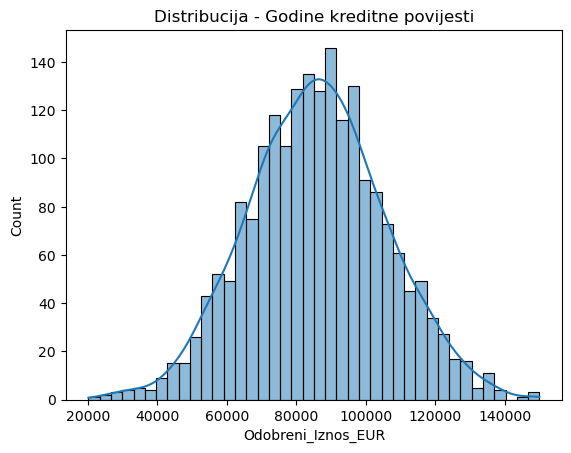

In [54]:
sns.histplot(df_text_ok["Odobreni_Iznos_EUR"], bins=40, kde=True)
plt.title("Distribucija - Godine kreditne povijesti")
plt.show()

In [55]:
df_text_ok.isnull().sum()

ID_Klijenta                    0
Odobreni_Iznos_EUR             0
Mjesečna_Primanje_EUR        101
Trenutni_Dug_EUR             101
Starost_Klijenta             101
Staž_Godine                  101
Godine_Kreditne_Povijesti    101
Broj_članova_Kućanstva       101
Spol                           0
Stambeni_Status                0
Obrazovanje                    0
dtype: int64

In [56]:
### Zaključak: distribucija također dobro izgleda te ne postoje prazne ćelije. Na ovoj kolini nema
### potrebe za daljnim čišćenjem i popunjavanjem podataka.

In [57]:
##################################################################################
### 2.2. Broj_članova_Kućanstva
##################################################################################

In [58]:
df_text_ok['Broj_članova_Kućanstva'].describe()

count    1919.000000
mean        2.647212
std         1.587254
min        -5.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Broj_članova_Kućanstva, dtype: float64

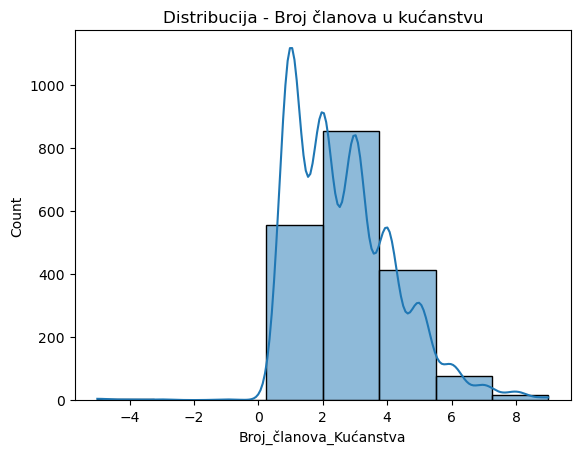

In [59]:
sns.histplot(df_text_ok["Broj_članova_Kućanstva"], bins=8, kde=True)
plt.title("Distribucija - Broj članova u kućanstvu")
plt.show()

In [60]:
df_text_ok['Broj_članova_Kućanstva'].sort_values().head(10)

932    -5.0
545    -5.0
810    -4.0
45     -3.0
46     -1.0
1967    1.0
88      1.0
91      1.0
92      1.0
94      1.0
Name: Broj_članova_Kućanstva, dtype: float64

In [61]:
df_text_ok["Broj_članova_Kućanstva"].value_counts()

Broj_članova_Kućanstva
 1.0    554
 2.0    442
 3.0    410
 4.0    265
 5.0    149
 6.0     54
 7.0     23
 8.0     13
 9.0      4
-5.0      2
-3.0      1
-1.0      1
-4.0      1
Name: count, dtype: int64

In [62]:
### Zaključak: min ima vrijednost -5 što je nepravilnost, ali vidlivo je kako postoje i još neke 
### negativne vrijednosti. Pretpostavka: pogrešno je unesena negativna vrijednost, pa ju treba 
### pretvoriti u pozitivnu...

In [63]:
df_text_ok['Broj_članova_Kućanstva'] = df_text_ok['Broj_članova_Kućanstva'].abs()

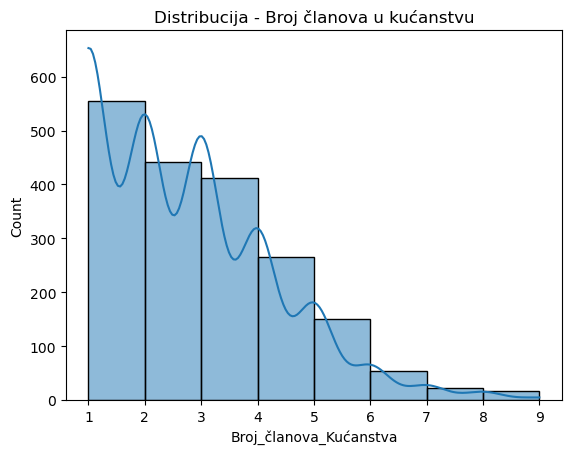

In [64]:
sns.histplot(df_text_ok["Broj_članova_Kućanstva"], bins=8, kde=True)
plt.title("Distribucija - Broj članova u kućanstvu")
plt.show()

In [65]:
### Zaključak: Broj članova u kućanstvu sada izgleda realnije, ali postoje prazne ćelije...

In [66]:
df_text_ok["Broj_članova_Kućanstva"].median()

2.0

In [67]:
df_text_ok["Broj_članova_Kućanstva"] = df_text_ok["Broj_članova_Kućanstva"].fillna(value=2.0)
df_text_ok["Broj_članova_Kućanstva"].value_counts()

Broj_članova_Kućanstva
1.0    555
2.0    543
3.0    411
4.0    266
5.0    151
6.0     54
7.0     23
8.0     13
9.0      4
Name: count, dtype: int64

In [68]:
df_text_ok["Broj_članova_Kućanstva"].isna().sum()

np.int64(0)

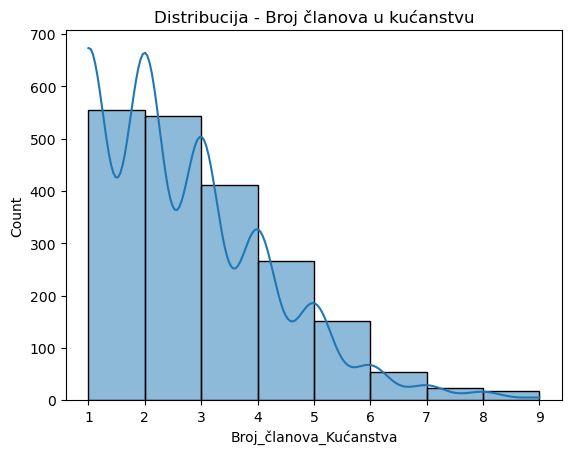

In [69]:
sns.histplot(df_text_ok["Broj_članova_Kućanstva"], bins=8, kde=True)
plt.title("Distribucija - Broj članova u kućanstvu")
plt.show()

In [70]:
### Zaključak: kolona više nema praznih ćelija kao ni negativnih vrijednosti....

In [71]:
##################################################################################
### 2.3. Mjesečna_Primanje_EUR
##################################################################################

In [72]:
df_text_ok["Mjesečna_Primanje_EUR"].describe()

count     1919.000000
mean      6694.880573
std       1838.166648
min       1644.560000
25%       5467.530000
50%       6618.190000
75%       7935.160000
max      19246.942762
Name: Mjesečna_Primanje_EUR, dtype: float64

In [73]:
df_text_ok["Mjesečna_Primanje_EUR"].isna().sum()

np.int64(101)

In [74]:
### Zaključak: ovdje se vidi jako velik raspon između najniže i najviše plaće te postoje i prazne ćelije.
### Jako velik raspon između min i max vrijednosti često može značiti pojavu outliera.

In [75]:
df_text_ok["Mjesečna_Primanje_EUR"].value_counts().sort_values()

Mjesečna_Primanje_EUR
5137.90      1
5575.77      1
8382.24      1
8445.93      1
8384.13      1
            ..
7453.87      2
3716.10      2
5736.95      2
9110.80      2
10000.00    56
Name: count, Length: 1848, dtype: int64

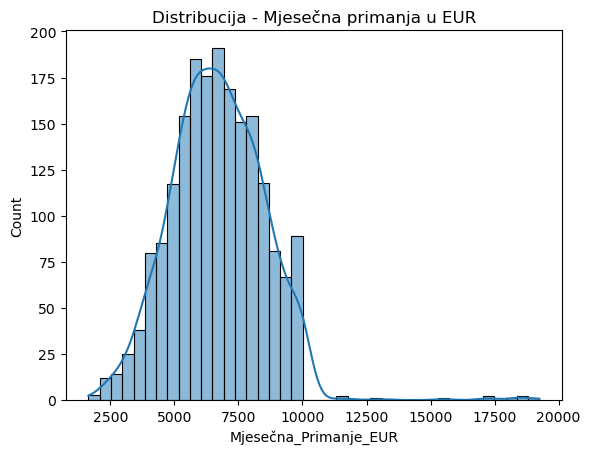

In [76]:
sns.histplot(df_text_ok["Mjesečna_Primanje_EUR"], bins=40, kde=True)
plt.title("Distribucija - Mjesečna primanja u EUR")
plt.show()

In [77]:
high_salaries = df_text_ok[df_text_ok["Mjesečna_Primanje_EUR"] > 10000]

In [78]:
print(f'Postotak primanja > 10000 EUR: {(len(high_salaries) / len(df_text_ok)) * 100} %')
print(f'Broj osoba koje imaju > 10000 EUR = {len(high_salaries)}')

Postotak primanja > 10000 EUR: 0.49504950495049505 %
Broj osoba koje imaju > 10000 EUR = 10


In [79]:
### Zaključak: ukupno 10 osoba ili 0,5% primanja su veća od 10000 EUR. 

In [80]:
df_text_ok.groupby("Obrazovanje")["Mjesečna_Primanje_EUR"].describe()

count         mean          std      min        25%       50%  \
Obrazovanje                                                                   
Magisterij    265.0  8555.725078  1358.522896  5039.73  7745.8200  8472.010   
SSS          1018.0  5838.528180  1553.467679  1644.56  4853.7225  5790.350   
VSS           636.0  7290.231112  1611.735466  2874.45  6258.1450  7234.995   

                   75%           max  
Obrazovanje                           
Magisterij   9378.9400  18494.558808  
SSS          6794.6100  18342.513107  
VSS          8236.5525  19246.942762

In [81]:
### Zaključak: nedoumica koja se ovdje pojavljuje je činjenica da tih 10 osoba s primanjima većim od
### 10000 mogu biti outlieri, ali isto tako mogu biti i posljedica stupnja obrazovanja. Iz gore 
### navedenog grupiranja se vidi da stupanj obrazovanja ne čini bitnu razliku kod max mjesečnih
### primanja. Kod min iznosa mjesečnih primanja postoji primjetna razlika, ali sukladno grafičkom
### prikazu ona nisu tako problematična.

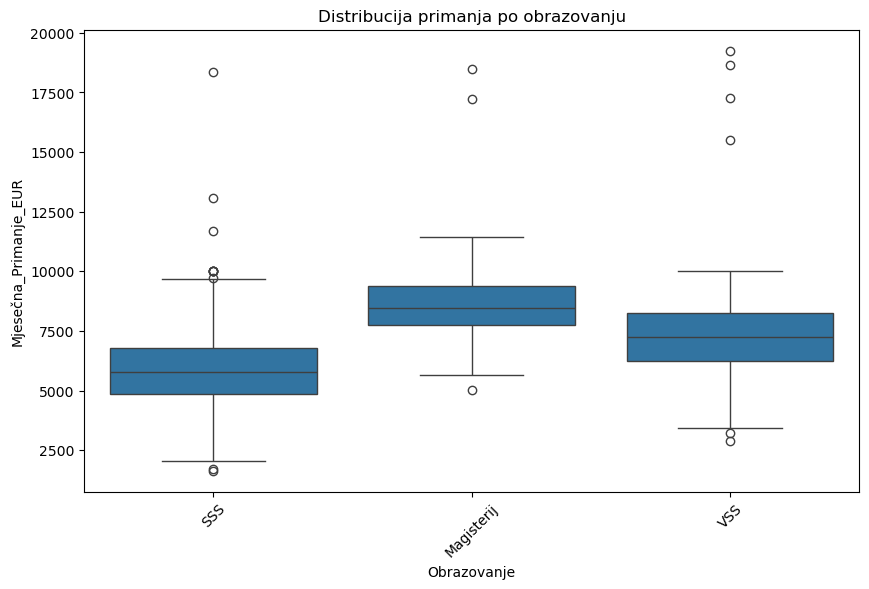

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_text_ok, x="Obrazovanje", y="Mjesečna_Primanje_EUR")
plt.xticks(rotation=45)
plt.title("Distribucija primanja po obrazovanju")
plt.show()

In [83]:
### Zaključak: iz navedenog grafa zorno se vide outlieri prema stupnju obrazovanja. Outliere je potrebno
### popraviti, ali prije korištenja IQR metode potrebno je popuniti prazne ćelije kako metoda ne bi
### pogrešno odredila outliere.

In [84]:
df_text_ok["Mjesečna_Primanje_EUR"].median()

6618.19

In [85]:
df_text_ok["Mjesečna_Primanje_EUR"] = df_text_ok["Mjesečna_Primanje_EUR"].fillna(value=6618.19)

In [86]:
df_text_ok["Mjesečna_Primanje_EUR"].isna().sum()

np.int64(0)

In [87]:
### Zaključak: popunjene su sve ćelije medijalnom vrijednošću te je sad moguće provesti IQR metodu.

In [88]:
for col in ["Mjesečna_Primanje_EUR"]:
    df_text_ok[col] = tb.iqr_method(df_text_ok[col])

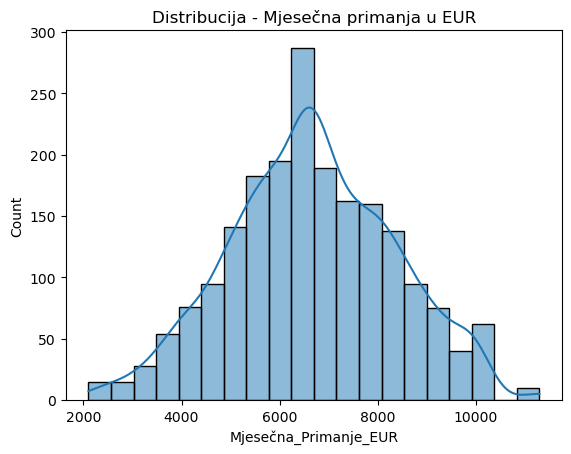

In [89]:
sns.histplot(df_text_ok["Mjesečna_Primanje_EUR"], bins=20, kde=True)
plt.title("Distribucija - Mjesečna primanja u EUR")
plt.show()

In [90]:
df_text_ok["Mjesečna_Primanje_EUR"].value_counts().sort_values()

Mjesečna_Primanje_EUR
9492.140       1
7241.580       1
4756.090       1
7952.560       1
3871.900       1
            ... 
7453.870       2
2101.015       4
11301.435     10
10000.000     56
6618.190     102
Name: count, Length: 1836, dtype: int64

In [91]:
df_text_ok[df_text_ok["Mjesečna_Primanje_EUR"] > 10000]["Mjesečna_Primanje_EUR"]

403     11301.435
406     11301.435
579     11301.435
720     11301.435
959     11301.435
1077    11301.435
1473    11301.435
1678    11301.435
1802    11301.435
2000    11301.435
Name: Mjesečna_Primanje_EUR, dtype: float64

In [92]:
### Zaključak: nakon IQR metode, najviša mjesečna primanja svedena su na vrijednost od 11301.435 EUR
### te sada imamo normalnu razdiobu.

In [93]:
##################################################################################
### 2.4. Trenutni_Dug_EUR
##################################################################################

In [94]:
df_text_ok["Trenutni_Dug_EUR"].describe()

count     1919.00000
mean     43534.26522
std       5928.30992
min          0.00000
25%      45000.00000
50%      45000.00000
75%      45000.00000
max      96932.52968
Name: Trenutni_Dug_EUR, dtype: float64

In [95]:
### Zaključak: na prvu je vidljivo da postoji veliki raspon između min i max vrijednosti - Potencijalni
### outlieri. Ono što je također neobično su vrijednosti za sve kvartile koje iznose 45000.

In [96]:
df_text_ok["Trenutni_Dug_EUR"].value_counts().sort_values()

Trenutni_Dug_EUR
7005.27        1
39059.44       1
40204.15       1
33795.05       1
33706.12       1
            ... 
27290.05       2
18608.76       2
38649.07       2
10000.00       3
45000.00    1658
Name: count, Length: 257, dtype: int64

In [97]:
### Zaključak: vrijednost 45000 se pojavljuje 1658 puta u datasetu što je iznimno mnogo. 

In [98]:
df_text_ok[df_text_ok["Trenutni_Dug_EUR"] == 0]

ID_Klijenta  Odobreni_Iznos_EUR  Mjesečna_Primanje_EUR  \
1615         2616           148862.15                10000.0   

      Trenutni_Dug_EUR  Starost_Klijenta  Staž_Godine  \
1615               0.0              42.0         22.0   

      Godine_Kreditne_Povijesti  Broj_članova_Kućanstva   Spol  \
1615                        2.0                     3.0  Muško   

     Stambeni_Status Obrazovanje  
1615         Vlasnik         VSS

In [99]:
dugovanje = df_text_ok[df_text_ok["Trenutni_Dug_EUR"] == 45000]

In [100]:
print(f'Udio vrijednosti 45000 u datasetu: {(len(dugovanje) / len(df_text_ok)) * 100} %')

Udio vrijednosti 45000 u datasetu: 82.07920792079207 %


In [101]:
is_nan = df_text_ok["Trenutni_Dug_EUR"].isna().sum()

In [102]:
print(f'Ukupno stvarnih zapisa: {len(df_text_ok) - len(dugovanje) - is_nan}')

Ukupno stvarnih zapisa: 261


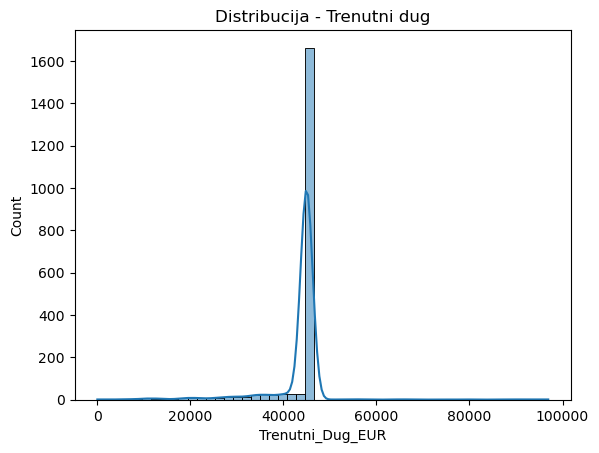

In [103]:
sns.histplot(df_text_ok["Trenutni_Dug_EUR"], bins=50, kde=True)
plt.title("Distribucija - Trenutni dug")
plt.show()

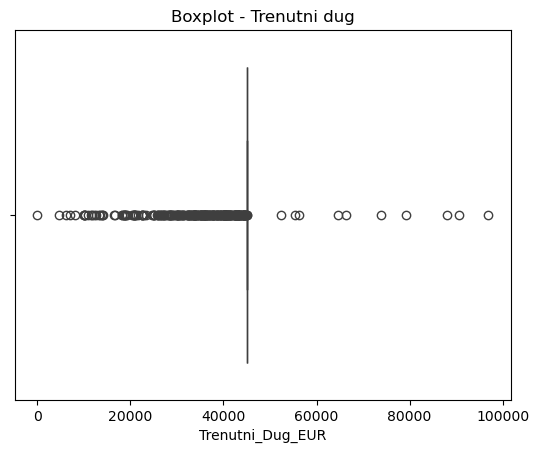

In [104]:
sns.boxplot(x=df_text_ok["Trenutni_Dug_EUR"])
plt.title("Boxplot - Trenutni dug")
plt.show()

In [105]:
### Zaključak: u koloni se nalazi nešto više od 80% zapisa od 45000. Kada se tomu pridodaju i ćelije 
### bez vrijednosti, stvarnih zapisa je oko 12-13%. Najveći problem predstavljaju zapisi od 45000.
### Hipoteza:
    ### 1) Greška prilikom unosa klijena u bazu podataka (pripravnik koji je koristio određeni
    ### obrazac u kojem je zaboravio ispraviti vrijednost duga).
    ### 2) Vrijednost 45000 indicira da klijent ima određeni dug, ali nije točno upisan.
    ### 3) Banka sve svoje klijente smatra dužnicima dok se ne dokaže suprotno... :-) :-)

### Istraživanje: prema statističkim izvješćima za 2024. godinu 1/3 kućanstava u RH ima neki
### oblik kredita ili duga prema banci.

### Ideja je bila sklairati statističko istraživanje na dataframe, ali kako postotci ne odgovaraju
### jer je u dataframe-u obrnuta situacija u kojoj je preko 80% dužnika.

### Potencijalna rješenja:
    ### 1) Zatražiti od banke stvarne podatke te ih uvrstiti u ovu analizu.
    ### 2) Obrisati kolonu u slučaju da stvarni podaci nisu dostupni.
    ### 3) Zadržati kolonu i NaN vrijednosti zanijeniti vrijednošću 0.0

In [106]:
df_text_ok["Trenutni_Dug_EUR"] = df_text_ok["Trenutni_Dug_EUR"].fillna(value=0.0)

In [107]:
df_text_ok["Trenutni_Dug_EUR"].isna().sum()

np.int64(0)

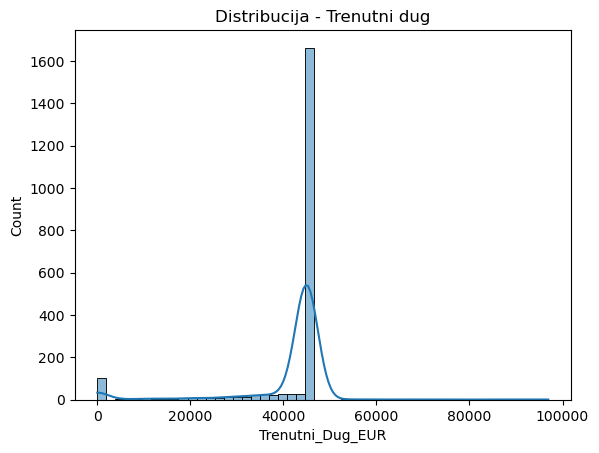

In [108]:
sns.histplot(df_text_ok["Trenutni_Dug_EUR"], bins=50, kde=True)
plt.title("Distribucija - Trenutni dug")
plt.show()

In [109]:
### Zaključak: premda kolona sadrži preko 80% identične vrijednosti duga ostavljena je za daljnu analizu
### zbog pretpostavke da klijent posjeduje neki dug, ali nam nije točno poznat koliki je točno. Nadalje, 
### ova varijabla je bitna kod odobravanja buduće visine zaduženja jer se klijenta drugačije "gleda" ako 
### već ima dug i na taj način sprečava da uđe u još veća zaduženja koja ne može pokriti...

### Logaritamsku normalizaciju se ne isplati raditi jer distribucija nije nagnuta (lijevo ili desno), 
### već imamo veliku dominaciju vrijednosti 45000.

In [110]:
##################################################################################
### 2.5. Diskrepancija 3 kolone
##################################################################################

In [111]:
### *kopija dataframe-a za daljnu analizu kako bismo se mogli kasnije vratiti u slučaju potrebe!!!!

In [112]:
df_4_kolone = df_text_ok.copy()

In [113]:
df_4_kolone[["Starost_Klijenta", "Staž_Godine", "Godine_Kreditne_Povijesti"]].describe()

Starost_Klijenta  Staž_Godine  Godine_Kreditne_Povijesti
count       1919.000000  1919.000000                1919.000000
mean          35.178739    15.392392                  15.137051
std            9.854248     5.660518                   8.801156
min           12.000000     0.000000                   0.000000
25%           28.000000    11.000000                   8.000000
50%           35.000000    15.000000                  15.000000
75%           42.000000    19.000000                  23.000000
max          100.000000    37.000000                  30.000000

In [114]:
### Zaključak: kada se pogledaju ove tri varijable može se primjetiti da se starost klijenata kreće
### od 12 do 100 godina što je malo neobično za minimalnu vrijednost. Može se zaključiti kako se radi 
### o outlierima. 

### Nadalje, Staž_Godine se čini u redu jer klijent može imati 0 godina staža (prvo zaposlenje). Isto
### tako i maksimalna vrijednost izgleda realno. Isto vrijedi i za Godine_Kreditne_Povijesti. 

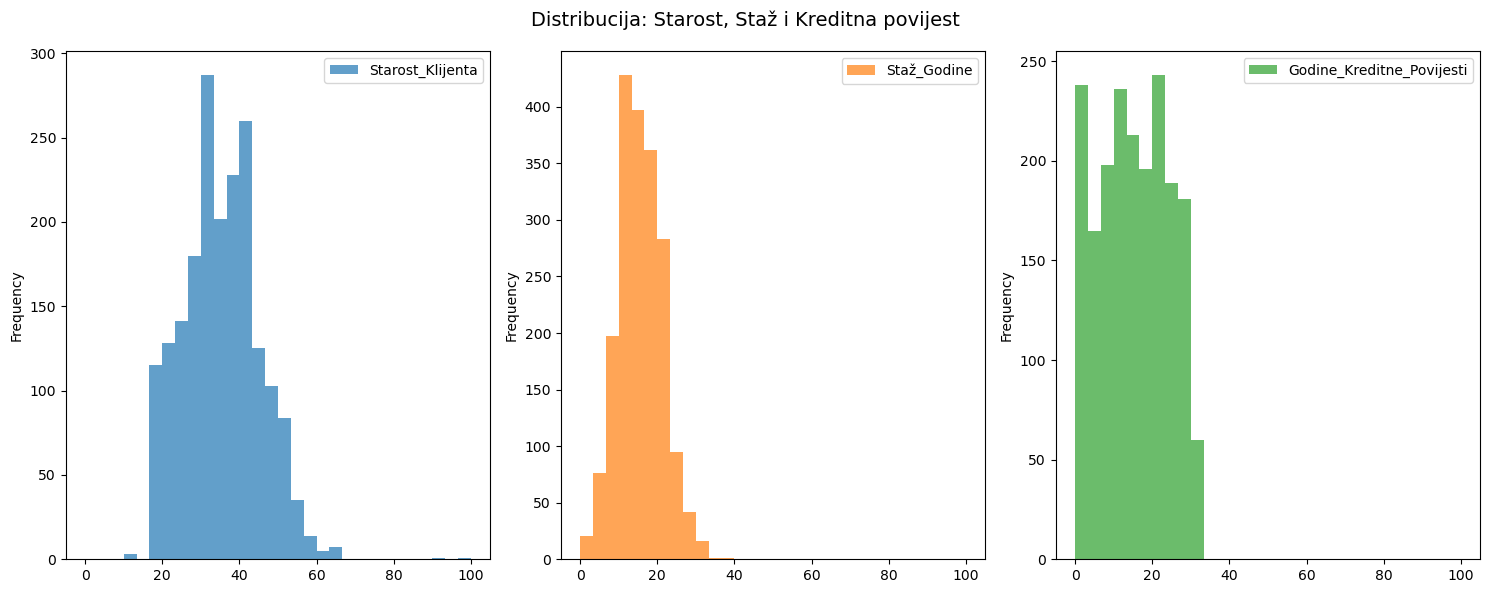

In [115]:
df_4_kolone[["Starost_Klijenta", 
             "Staž_Godine", 
             "Godine_Kreditne_Povijesti"
    ]].plot(kind='hist', bins=30, alpha=0.7, subplots=True, layout=(1, 3), figsize=(15, 6))
plt.suptitle("Distribucija: Starost, Staž i Kreditna povijest", fontsize=14)
plt.tight_layout()
plt.show()

In [116]:
df_4_kolone[["Starost_Klijenta", "Staž_Godine", "Godine_Kreditne_Povijesti"]].isna().sum()

Starost_Klijenta             101
Staž_Godine                  101
Godine_Kreditne_Povijesti    101
dtype: int64

In [117]:
### Zaključak: sukladno grafičlim prikazuma Staž_Godine i Godine_Kreditne_Povijesti imaju dobre 
### distribucije. Staž_Godine ima normalnu razdiobu, a Godine_Kreditne_Povijesti izgleda realno te u 
### načelu tim varijablama treba popuniti prazne ćelije koje imaju sve tri varijable. Kod 
### Starost_Klijenta vidljivo je postojanje outliera koje treba popraviti.

In [118]:
df_4_kolone["Staž_Godine"].median()

15.0

In [119]:
df_4_kolone["Staž_Godine"] = df_4_kolone["Staž_Godine"].fillna(value=15.0)

In [120]:
df_4_kolone["Godine_Kreditne_Povijesti"].median()

15.0

In [121]:
df_4_kolone["Godine_Kreditne_Povijesti"] = df_4_kolone["Godine_Kreditne_Povijesti"].fillna(value=15.0)

In [122]:
### Staž_Godine	Godine_Kreditne_Povijesti sada imaju popunjene NaN ćelije s medijanom.

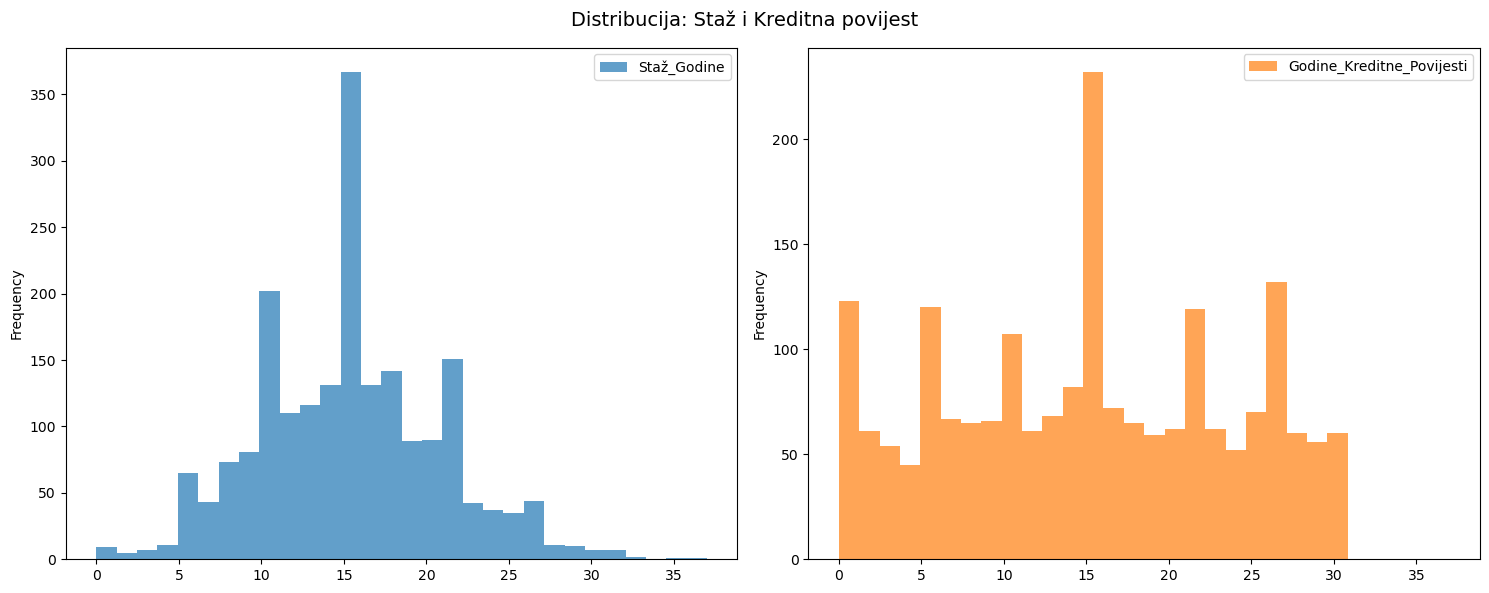

In [123]:
df_4_kolone[["Staž_Godine", 
             "Godine_Kreditne_Povijesti"
    ]].plot(kind='hist', bins=30, alpha=0.7, subplots=True, layout=(1, 2), figsize=(15, 6))
plt.suptitle("Distribucija: Staž i Kreditna povijest", fontsize=14)
plt.tight_layout()
plt.show()

In [124]:
df_4_kolone[["Staž_Godine", "Godine_Kreditne_Povijesti"]].isna().sum()

Staž_Godine                  0
Godine_Kreditne_Povijesti    0
dtype: int64

In [125]:
### Zaključak: obje varijable izgledaju realno te nemaju praznih ćelija

In [126]:
df_4_kolone[["Starost_Klijenta", 
             "Staž_Godine", 
             "Godine_Kreditne_Povijesti", 
             "Trenutni_Dug_EUR"
        ]].value_counts().sort_index().head(50)

Starost_Klijenta  Staž_Godine  Godine_Kreditne_Povijesti  Trenutni_Dug_EUR
12.0              15.0         2.0                        45000.00            1
                  18.0         18.0                       45000.00            1
                  20.0         14.0                       45000.00            1
18.0              0.0          2.0                        45000.00            1
                               8.0                        45000.00            2
                               15.0                       45000.00            1
                               27.0                       45000.00            1
                  1.0          9.0                        45000.00            1
                               13.0                       45000.00            1
                  2.0          9.0                        27290.05            2
                               24.0                       45000.00            1
                               30.0          

In [127]:
### Zaključak: međutim, sortiranjem vrijednosti prema godinama zorno se vidi diskrepancija između ove
### tri varijable kojma možemo slobodno pridružiti Trenutni_Dug_EUR. Već u prvom retku imamo nerealnu
### situaciju gdje klijent ima 12 godina starosti i u isto vrijeme radni staž od 15. godina.
### Nadalje, u drugom retku imamo klijenta starog 12 godina s 18 godina radnog staža i kreditne
### povijesti itd. 

### Zakon RH dopušta rad od 15. godine starosti uz uvjete (stručna praksu i sl.), dok je 16. godina
### starosti donja granica za ulazak na tržište rada...

### Kvaliteta podataka u ovom datasetu je vrlo upitna!!!!!!!!!! 

### Potencijalna rješenja:
    ### 1) Kao i u prethodnom koraku, potrebno je zatražiti banku točne podatke.
    ### 2) Ako točni podaci nisu dostupni, ove je četiri varijable potrebno obrisati.
    ### 3) Uz pretpostavku da su godine starosti klijenata točne (ne mora nužno biti) potrebno
    ### je sačuvati varijablu Starost_Klijenta, a ostale tri ukloniti.

### Na temelju Starost_Klijenta u novoj koloni se može izračunati procjenjene godine radnog staža.
### Za procjenu bi se baziralo na varijablu Obrazovanje (SSS, VSS, Magisterij) gdje bi se dodalo +1 ili
### +2 godine zbog eventualnog ponavljanja godine, pauza studija i sl. 


### Procjenjeni radni staž:
    ### Stupanj obrazovanja     Godine završetka školovanja    Godine prvog zaposlenja
    ### SSS (4 godine)          18                             19
    ### VSS                     23                             25
    ### Magisterij              25                             27

In [128]:
tb.estimated_work_experience_calculations(df_4_kolone)

Godine radnog staža (SSS): 9.0
Godine radnog staža (SSS): 15.0
Godine radnog staža (Magisterij): 0.0
Godine radnog staža (VSS): 7.0
Godine radnog staža (SSS): -1.0
Godine radnog staža (SSS): 18.0
Godine radnog staža (Magisterij): 8.0
Godine radnog staža (SSS): 8.0
Godine radnog staža (SSS): 23.0
Godine radnog staža (SSS): 25.0
Godine radnog staža (Magisterij): -8.0
Godine radnog staža (Magisterij): 0.0
Godine radnog staža (VSS): 2.0
Godine radnog staža (VSS): 1.0
Godine radnog staža (SSS): 24.0
Godine radnog staža (SSS): 14.0
Godine radnog staža (VSS): 7.0
Godine radnog staža (SSS): -1.0
Godine radnog staža (SSS): 22.0
Godine radnog staža (VSS): -2.0
Godine radnog staža (SSS): 17.0
Godine radnog staža (VSS): 13.0
Godine radnog staža (VSS): 24.0
Godine radnog staža (VSS): -3.0
Godine radnog staža (SSS): -1.0
Godine radnog staža (SSS): 18.0
Godine radnog staža (VSS): 28.0
Godine radnog staža (Magisterij): 20.0
Godine radnog staža (SSS): 18.0
Godine radnog staža (Magisterij): 3.0
Godine r

In [129]:
### Zaključak: iteracijom je moguće izračunati Procjenjeni radni staž, ali je vidljivo kako imamo 
### negativne vrijednosti kao i NaN (101 ćelija). 

### Sljedeći korak: 
    ### 1) Popuniti NaN ćelije medijanom
    ### 2) Srediti outlier-e
    ### 3) Ponoviti iteraciju za Procjenjeni radni staž.

### Ako u Procjenjenom radnom stažu ne bude negativnih vrijednosti, kreiram novu kolonu s procjenjenim
### radnim stažom. 

In [130]:
df_4_kolone["Starost_Klijenta"].median()

35.0

In [131]:
df_4_kolone["Starost_Klijenta"] = df_4_kolone["Starost_Klijenta"].fillna(value=35.0)

In [132]:
df_4_kolone["Starost_Klijenta"].isna().sum()

np.int64(0)

In [133]:
### Zaključak: u koloni Starost_klijent više ne postoje prazne ćelije. Sada je potrebno srediti 
### outliere IQR metodom....

In [134]:
for col in ["Starost_Klijenta"]:
    df_4_kolone[col] = tb.iqr_method(df_4_kolone[col])

In [135]:
df_4_kolone["Starost_Klijenta"].value_counts().sort_index()

Starost_Klijenta
12.0      3
18.0     97
19.0     18
20.0     23
21.0     29
22.0     38
23.0     38
24.0     43
25.0     45
26.0     53
27.0     62
28.0     52
29.0     66
30.0     72
31.0     70
32.0     64
33.0     81
34.0     77
35.0    169
36.0     57
37.0     76
38.0     79
39.0     73
40.0     79
41.0     67
42.0     59
43.0     55
44.0     51
45.0     40
46.0     34
47.0     50
48.0     27
49.0     26
50.0     30
51.0     19
52.0     21
53.0     14
54.0     11
55.0     16
56.0      8
57.0      4
58.0      6
59.0     18
Name: count, dtype: int64

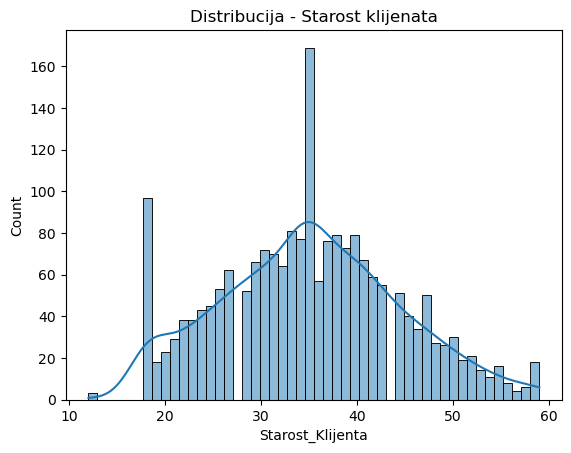

In [136]:
sns.histplot(df_4_kolone["Starost_Klijenta"], bins=50, kde=True)
plt.title("Distribucija - Starost klijenata")
plt.show()

In [137]:
### Zaključak: imamo normalnu razdiobu, no također imamo i tri vrijednosti od 12 godina koje tu nisu
### realne. 

In [138]:
df_4_kolone[df_4_kolone["Starost_Klijenta"] == 12]

ID_Klijenta  Odobreni_Iznos_EUR  Mjesečna_Primanje_EUR  \
161          1162           100741.69                6956.03   
914          1915            83094.09                6403.65   
1320         2321            86133.00                7353.84   

      Trenutni_Dug_EUR  Starost_Klijenta  Staž_Godine  \
161            45000.0              12.0         20.0   
914            45000.0              12.0         18.0   
1320           45000.0              12.0         15.0   

      Godine_Kreditne_Povijesti  Broj_članova_Kućanstva   Spol  \
161                        14.0                     2.0  Muško   
914                        18.0                     4.0  Muško   
1320                        2.0                     1.0  Muško   

     Stambeni_Status Obrazovanje  
161          Vlasnik         SSS  
914          Vlasnik         VSS  
1320       Podstanar         VSS

In [139]:
### Zaključak: s obzirom da je kolona Staž_Godine proglašena kolonom nepouzdanih podataka, a u ovom 
### slučaju imam svega tri zapisa gdje je starost klijenta 12 godina, iste ću obrisati jer čine tek
### 0,14% podataka od ukupnog seta.

In [140]:
print((3/2020)*100)

0.1485148514851485


In [141]:
df_4_kolone = df_4_kolone[df_4_kolone["Starost_Klijenta"] >= 18]

In [142]:
df_4_kolone[df_4_kolone["Starost_Klijenta"] < 18]

Empty DataFrame
Columns: [ID_Klijenta, Odobreni_Iznos_EUR, Mjesečna_Primanje_EUR, Trenutni_Dug_EUR, Starost_Klijenta, Staž_Godine, Godine_Kreditne_Povijesti, Broj_članova_Kućanstva, Spol, Stambeni_Status, Obrazovanje]
Index: []

In [143]:
### Zaključak: uklonjena su tri retka čija je vrijednost iznosila 12 te se u dataframe-u nalaze klijenti
### čija se starosna dob kreće od 18 do 59 godina.

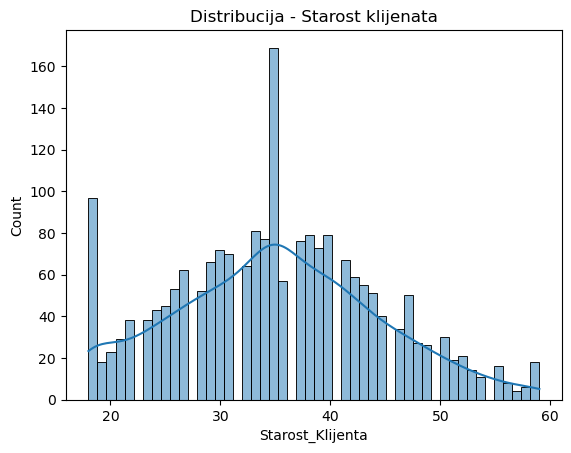

In [144]:
sns.histplot(df_4_kolone["Starost_Klijenta"], bins=50, kde=True)
plt.title("Distribucija - Starost klijenata")
plt.show()

In [145]:
tb.estimated_work_experience_calculations(df_4_kolone)

Godine radnog staža (SSS): 9.0
Godine radnog staža (SSS): 15.0
Godine radnog staža (Magisterij): 0.0
Godine radnog staža (VSS): 7.0
Godine radnog staža (SSS): -1.0
Godine radnog staža (SSS): 18.0
Godine radnog staža (Magisterij): 8.0
Godine radnog staža (SSS): 8.0
Godine radnog staža (SSS): 23.0
Godine radnog staža (SSS): 25.0
Godine radnog staža (Magisterij): -8.0
Godine radnog staža (Magisterij): 0.0
Godine radnog staža (VSS): 2.0
Godine radnog staža (VSS): 1.0
Godine radnog staža (SSS): 24.0
Godine radnog staža (SSS): 14.0
Godine radnog staža (VSS): 7.0
Godine radnog staža (SSS): -1.0
Godine radnog staža (SSS): 22.0
Godine radnog staža (VSS): -2.0
Godine radnog staža (SSS): 17.0
Godine radnog staža (VSS): 13.0
Godine radnog staža (VSS): 24.0
Godine radnog staža (VSS): -3.0
Godine radnog staža (SSS): -1.0
Godine radnog staža (SSS): 18.0
Godine radnog staža (VSS): 28.0
Godine radnog staža (Magisterij): 20.0
Godine radnog staža (SSS): 18.0
Godine radnog staža (Magisterij): 3.0
Godine r

In [146]:
### Zaključak: pretpostavka da su godine starosti klijenata točne u ovom testu se pokazala netočnom.
### Kada promatramo Trenutni_Dug_EUR, Starost_Klijenta, Staž_Godine i Godine_Kreditne_Povijesti 
### pojedinačno, njihovi sirovi podaci imaju relativno dobre raspone i sl. Najviše iskače 
### Trenutni_Dug_EUR sa svojim vrijednostima. Iza Trenutni_Dug_EUR je Starost_Klijenta čiji je raspon
### između 12 i 100 godina što je također realno s aspekta starosti generalno, ali sa aspekta radong
### staža poprima nerealne vrijednosti. 

### Međutim, kada se pogledaju podaci u cjelini za te četiri kolone vidljivo je kako su oni potpuno
### nerealni, pa smo tako imali zapise da je osoba stara 12 godina, ima 15 godina radnog staža i duguje
### banci 45000 Eur.

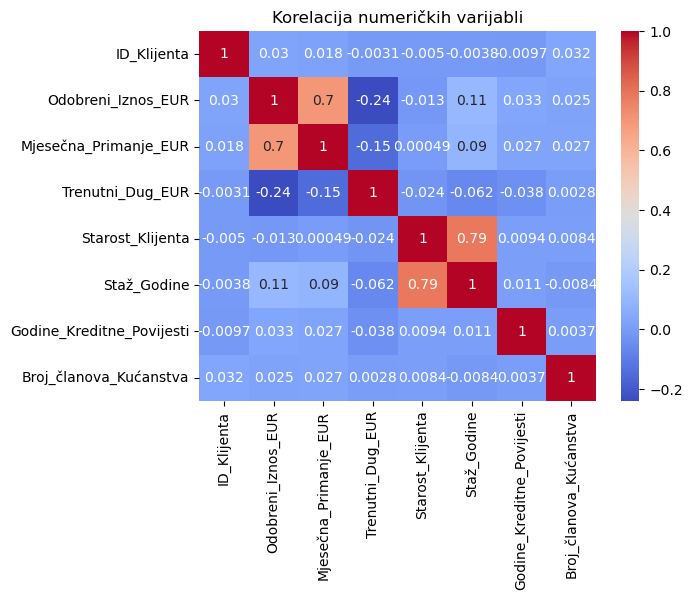

In [147]:
sns.heatmap(df_4_kolone.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelacija numeričkih varijabli")
plt.show()

In [148]:
### U prilog prethodnom zaključku, iz heatmap-a se jasno vidi koliko su ti podaci nekvalitetni. 
### Za pretpostaviti je kako je cijeli dataset nasumično generiran. Koorelacija svih numeričkih 
### je ispod 1%.

In [149]:
##################################################################################
##################################################################################
### 3. UKLANJANJE DUPLIKATA
##################################################################################
##################################################################################

In [150]:
duplici = df_4_kolone.duplicated()

In [151]:
print(f'Broj duplikata: {duplici.sum()}')

Broj duplikata: 12


In [152]:
df_4_kolone[duplici][0:].sort_index()

ID_Klijenta  Odobreni_Iznos_EUR  Mjesečna_Primanje_EUR  \
2001         2480            76250.83                7132.88   
2004         2143            81998.89                5983.53   
2005         1063            62873.30                3716.10   
2006         1051            91481.68                7229.75   
2008         2315            85207.05                5352.13   
2010         1822           113186.95                7453.87   
2012         2497           126230.07               10000.00   
2013         2328            82118.25                5583.45   
2015         2658           111351.95                7401.28   
2016         1873            57413.62                3205.30   
2017         2703            97694.43                9542.15   
2018         1528            85961.70                6112.71   

      Trenutni_Dug_EUR  Starost_Klijenta  Staž_Godine  \
2001          45000.00              49.0         25.0   
2004          45000.00              34.0         16.0   
2005          45000.00              39.0         12.0   
2006          45000.00              43.0         16.0   
2008          45000.00              31.0         13.0   
2010          45000.00              43.0         24.0   
2012          18608.76              43.0         24.0   
2013          45000.00              29.0         16.0   
2015          27290.05              18.0          2.0   
2016          45000.00              18.0          0.0   
2017          45000.00              26.0         13.0   
2018          45000.00              41.0         19.0   

      Godine_Kreditne_Povijesti  Broj_članova_Kućanstva    Spol  \
2001                       14.0                     1.0   Muško   
2004                       21.0                     2.0   Muško   
2005                       24.0                     7.0   Muško   
2006                        1.0                     4.0  Žensko   
2008                        8.0                     7.0  Žensko   
2010                       27.0                     1.0   Muško   
2012                        7.0                     3.0  Žensko   
2013                       17.0                     1.0   Muško   
2015                        9.0                     1.0  Žensko   
2016                        8.0                     6.0  Žensko   
2017                       25.0                     1.0   Muško   
2018                       21.0                     4.0   Muško   

     Stambeni_Status Obrazovanje  
2001       Podstanar         VSS  
2004       Podstanar         SSS  
2005       Podstanar         SSS  
2006       Podstanar         VSS  
2008       Podstanar         SSS  
2010         Vlasnik         SSS  
2012         Vlasnik  Magisterij  
2013       Podstanar         SSS  
2015       Podstanar         SSS  
2016       Podstanar         SSS  
2017         Vlasnik  Magisterij  
2018         Vlasnik         SSS

In [153]:
print(f'Broj redaka u df: {len(df_4_kolone)}')

Broj redaka u df: 2017


In [154]:
df_4_kolone.drop_duplicates(inplace=True)

In [155]:
print(f'Broj redaka u df: {len(df_4_kolone)}')

Broj redaka u df: 2005


In [156]:
### Zaključak: u dataframe-u bilo je 12 dupliciranih redaka koji su uklonjeni. Ukupno je uklonjeno 15
### redaka te sada dataframe ima 2005 redaka.

In [157]:
##################################################################################
### 4. KREIRANJE FINALNOG DATAFRAME-A

df_final = df_4_kolone.copy()
##################################################################################
##################################################################################

In [158]:
##################################################################################
##################################################################################
### 5. KORELACIJE
##################################################################################
##################################################################################

In [159]:
##################################################################################
### 5.1. ODNOSI IZMEĐU PODATAKA PREMA KATEGORIJSKIM VARIJABLAMA
##################################################################################

In [160]:
df_final.groupby("Spol")["Odobreni_Iznos_EUR"].mean()

Spol
Muško     85943.155516
Žensko    85747.251084
Name: Odobreni_Iznos_EUR, dtype: float64

<Axes: ylabel='Odobreni_Iznos_EUR'>

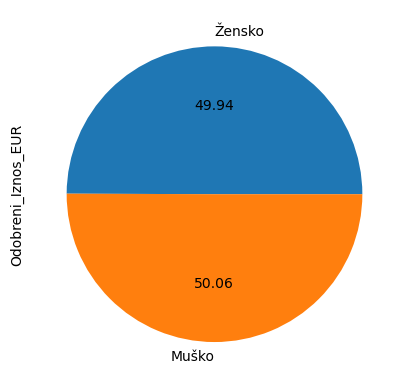

In [161]:
df_final.groupby("Spol")["Odobreni_Iznos_EUR"].mean().sort_values().plot(kind='pie', autopct='%.2f')

In [162]:
### Zaključak: spol nema značajan utjecaj na iznos odobrenog kredita.

In [163]:
df_final.groupby("Stambeni_Status")["Odobreni_Iznos_EUR"].mean()

Stambeni_Status
Podstanar    85391.323323
Vlasnik      86771.546909
Name: Odobreni_Iznos_EUR, dtype: float64

<Axes: ylabel='Odobreni_Iznos_EUR'>

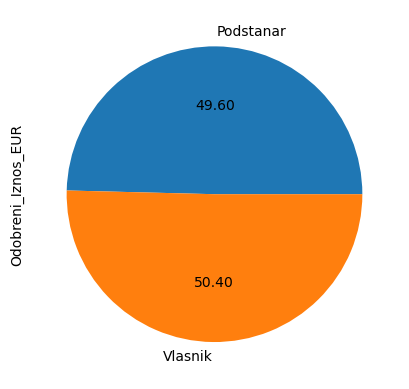

In [164]:
df_final.groupby("Stambeni_Status")["Odobreni_Iznos_EUR"].mean().plot(kind='pie', autopct='%.2f')

In [165]:
### Zaključak: stambeni status također nema značajan utjecaj na iznos odobrenog kredita.

In [166]:
df_final.groupby("Obrazovanje")["Odobreni_Iznos_EUR"].mean()

Obrazovanje
Magisterij    84695.553514
SSS           85994.447720
VSS           86261.696176
Name: Odobreni_Iznos_EUR, dtype: float64

<Axes: ylabel='Odobreni_Iznos_EUR'>

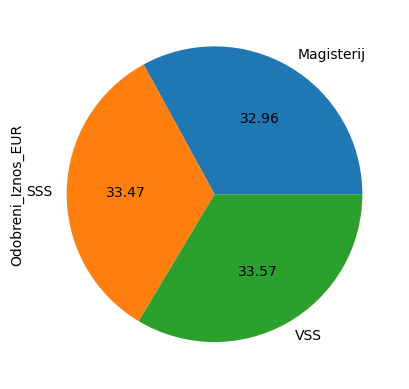

In [167]:
df_final.groupby("Obrazovanje")["Odobreni_Iznos_EUR"].mean().plot(kind='pie', autopct='%.2f')

In [168]:
### Zaključak: premda se očekuje da obrazovanje ima utjecaj na odobravanje kredita, ovdje nema 
### značajan utjecaj na tu varijablu.

In [169]:
df_final.groupby("Broj_članova_Kućanstva")["Odobreni_Iznos_EUR"].mean()

Broj_članova_Kućanstva
1.0    85374.652842
2.0    85450.352939
3.0    85715.274268
4.0    87620.339049
5.0    85798.333444
6.0    89214.645849
7.0    87515.444286
8.0    80636.609231
9.0    94931.952500
Name: Odobreni_Iznos_EUR, dtype: float64

<Axes: ylabel='Odobreni_Iznos_EUR'>

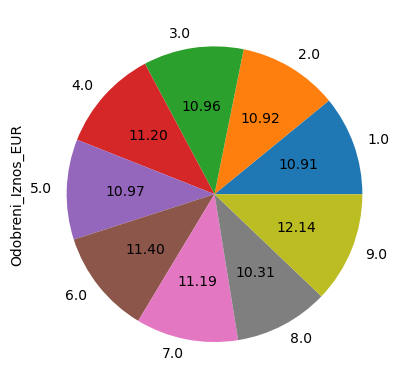

In [170]:
df_final.groupby("Broj_članova_Kućanstva")["Odobreni_Iznos_EUR"].mean().plot(kind='pie', autopct='%.2f')

In [171]:
### Zaključak: neovisno o broju članova, varijabla nema značajan utjecaj na iznos odobrenog kredita.

### Temeljem analize može se zaključiti kako kategorijske varijable nemaju utjecaj na iznos odobrenog 
### kredita što sugerira kako bi numeričke varijable (staž, primanja, starost i trenutni dug) mogle 
### imati utjecaj.

In [172]:
##################################################################################
### 5.2. ODNOSI IZMEĐU NUMERIČKIH PODATAKA 
##################################################################################

In [173]:
df_final.corr(numeric_only=True)

ID_Klijenta  Odobreni_Iznos_EUR  \
ID_Klijenta                   1.000000            0.027544   
Odobreni_Iznos_EUR            0.027544            1.000000   
Mjesečna_Primanje_EUR         0.015313            0.694873   
Trenutni_Dug_EUR             -0.001325           -0.237840   
Starost_Klijenta             -0.002883           -0.013762   
Staž_Godine                  -0.003678            0.104009   
Godine_Kreditne_Povijesti    -0.009593            0.034004   
Broj_članova_Kućanstva        0.037078            0.029658   

                           Mjesečna_Primanje_EUR  Trenutni_Dug_EUR  \
ID_Klijenta                             0.015313         -0.001325   
Odobreni_Iznos_EUR                      0.694873         -0.237840   
Mjesečna_Primanje_EUR                   1.000000         -0.145935   
Trenutni_Dug_EUR                       -0.145935          1.000000   
Starost_Klijenta                       -0.001473         -0.024092   
Staž_Godine                             0.086665         -0.062110   
Godine_Kreditne_Povijesti               0.027648         -0.039603   
Broj_članova_Kućanstva                  0.033903          0.001613   

                           Starost_Klijenta  Staž_Godine  \
ID_Klijenta                       -0.002883    -0.003678   
Odobreni_Iznos_EUR                -0.013762     0.104009   
Mjesečna_Primanje_EUR             -0.001473     0.086665   
Trenutni_Dug_EUR                  -0.024092    -0.062110   
Starost_Klijenta                   1.000000     0.785420   
Staž_Godine                        0.785420     1.000000   
Godine_Kreditne_Povijesti          0.008718     0.009071   
Broj_članova_Kućanstva             0.009166    -0.004080   

                           Godine_Kreditne_Povijesti  Broj_članova_Kućanstva  
ID_Klijenta                                -0.009593                0.037078  
Odobreni_Iznos_EUR                          0.034004                0.029658  
Mjesečna_Primanje_EUR                       0.027648                0.033903  
Trenutni_Dug_EUR                           -0.039603                0.001613  
Starost_Klijenta                            0.008718                0.009166  
Staž_Godine                                 0.009071               -0.004080  
Godine_Kreditne_Povijesti                   1.000000                0.006120  
Broj_članova_Kućanstva                      0.006120                1.000000

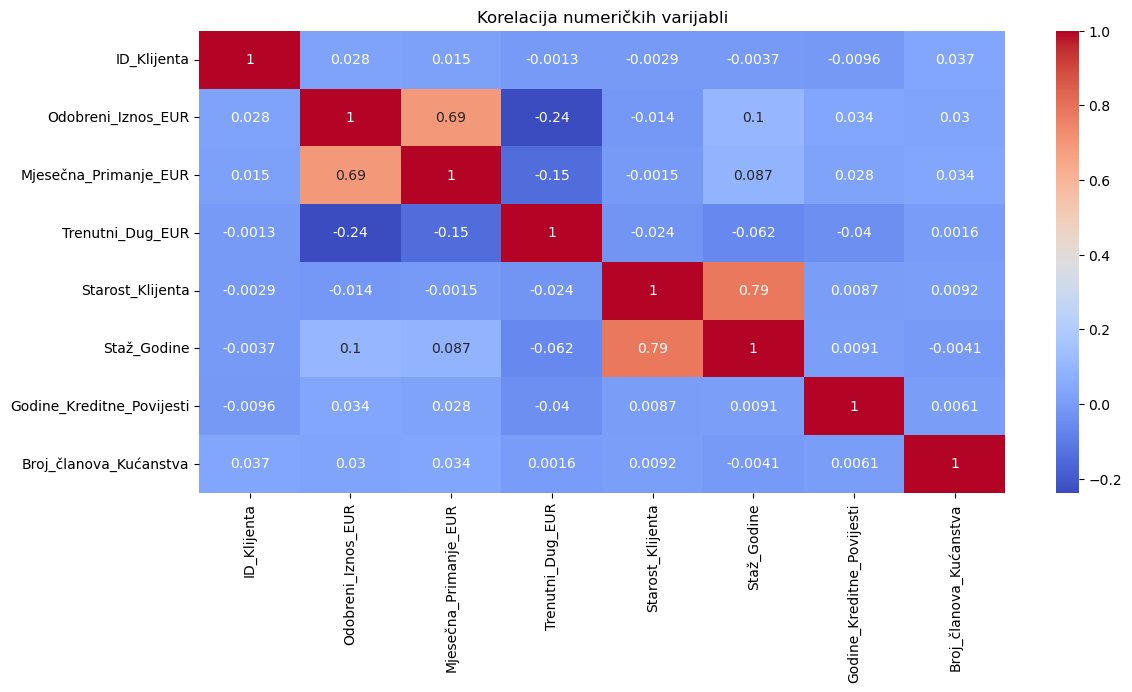

In [174]:
plt.figure(figsize=(13, 6))
sns.heatmap(df_final.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelacija numeričkih varijabli")
plt.show()

In [175]:
### Zaključak: iz priloženog se jasno vidi kako Mjesečna_Primanje_EUR najbolje koreliraju sa
### Odobreni_Iznos_EUR (0,69), dok ostale varijable imaju zanemariv utjecaj. U prijevodu, veća primanja
### rezultiraju većim iznosima odobrenog kredita.

In [176]:
##################################################################################
##################################################################################
### 5. ODREDITI KOJE SE VARIJABLE ZADRŽAVAJU
##################################################################################
##################################################################################

In [177]:
### Zaključak: gledajući numeričke razultate korelacije definitivno se zadržava varijabla 
### Mjesečna_Primanje_EUR zbog svoje visoke korelacije (0,69). No, ako se oslonimo na "osjećaj" trebalo
### bi zadržati i Trenutni_Dug_EUR jer banka sigurno neće rangirati jednako klijente sa i bez duga čisto
### s aspekta rizika poslovanja. Jednako tako bi trebalo zadržati Staž_Godine jer mladi klijenti imaju 
### mogućnost otplate dugoročnih kredita što banci daje veću osiguranje da će isti i odplatiti u 
### cjelosti za razliku od starijih klijenata koji su skloniji zdravstvenim poteškoćama. Dakle, izbaciti
### treba sve varijable čija je korelacija ispod 0,1 uključujići ID_Klijenta koja nema baš nikakvu
### svrhu za predikciju.

In [178]:
### ANOVA One-way

In [179]:
muskarci = df_final[df_final['Spol'] == 'Muško']['Odobreni_Iznos_EUR']
zene = df_final[df_final['Spol'] == 'Žensko']['Odobreni_Iznos_EUR']

In [180]:
F_statistic, p_value = stats.f_oneway(muskarci, zene)
print(f'F_statistic: {F_statistic}')

F_statistic: 0.031800687033307316


In [181]:
print(f'P_value: {p_value}')

P_value: 0.8584838390674798


In [182]:
### Zaključak: p_value = 0,85 što je daleko više od praga 0,05. Varijabla nema značajnih rezlika između 
### kredita odobrenih ženama, odnosno muškarcima...

In [183]:
### ANOVA Two-way

In [184]:
model_2_way = ols(
      'Odobreni_Iznos_EUR ~  C(Stambeni_Status) + C(Obrazovanje) + C(Stambeni_Status):C(Obrazovanje)', 
    data=df_final).fit()

In [185]:
anova_table_2_way = sm.stats.anova_lm(model_2_way, typ=2)

In [186]:
anova_table_2_way

sum_sq      df         F    PR(>F)
C(Stambeni_Status)                 9.029226e+08     1.0  2.310630  0.128650
C(Obrazovanje)                     5.076471e+08     2.0  0.649549  0.522392
C(Stambeni_Status):C(Obrazovanje)  1.619605e+08     2.0  0.207233  0.812848
Residual                           7.811474e+11  1999.0       NaN       NaN

In [187]:
### Zaključak: sve p_value vrijednosti veće su od 0,05 što znači da nema značajnih razlika prilikom
### odobravanja kredita.

In [188]:
###### Zaključak: Spol, Stambeni_Status	i Obrazovanje mogu biti uklonjene iz dataframe-a zajedno s 
###### gore spomenutim numeričkim varijablama.

###### Zadržati treba sljedeće varijable: Mjesečna_Primanje_EUR, Trenutni_Dug_EUR i Staž_Godine sukladno
###### objašnjenu koje je dato u analizi korealnosti.

In [189]:
#### KRAJ ZADATKA